## Prepare files for modeling with GBIS

Post-processing after smallbaselineApp.py

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import mintpy
from mintpy.objects import sensor
from mintpy.utils import readfile
from mintpy import save_roipac, save_gbis, asc_desc2horz_vert

## Common setting
ref_lat, ref_lon = 31.930, 130.864
out_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')

### Shinmoedake - ALOS descending track 73

Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy
save_roipac.py velocity.h5 -m maskTempCoh.h5 --ref-lalo 31.93 130.864
change reference point to y/x: [36, 50]
read None from file velocity.h5
convert velocity to displacement for 20081012_20100302
convert displacement to phase in radian
mask data based on input file: maskTempCoh.h5
write 20081012_20100302.unw
write 20081012_20100302.unw.rsc
save_gbis.py /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy/20081012_20100302.unw -g inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 43379
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeAlosDT73_20081012_20100302.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeAlosDT73_20081012_20100302.mat.mat
showing...


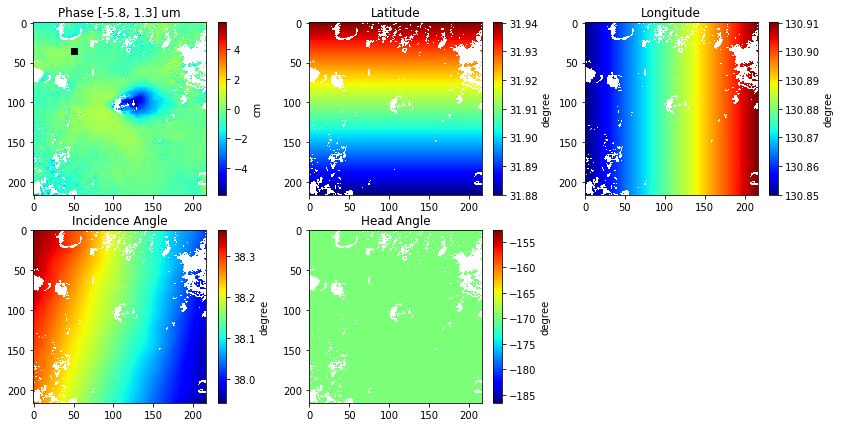

In [2]:
# Go to the mintpy directory
work_dir = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy')
os.chdir(work_dir)
print('Go to directory', work_dir)

# basic info
atr = readfile.read_attribute('velocity.h5')
date12 = atr['DATE12']

# save deformation to binary file in ROIPAC format
scp_args = 'velocity.h5 -m maskTempCoh.h5 --ref-lalo {lat} {lon}'.format(lat=ref_lat, lon=ref_lon)
print('save_roipac.py', scp_args)
unw_file1 = save_roipac.main(scp_args.split())
unw_file1 = os.path.abspath(unw_file1)

# prepare mat file in GBIS format
scp_args = '{} -g inputs/geometryGeo.h5 --out-dir {}'.format(unw_file1, out_dir)
print('save_gbis.py', scp_args)
mat_file = save_gbis.main(scp_args.split())

### Shinmoedake - ALOS descending track 73

Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy
save_roipac.py velocity.h5 -m maskTempCoh.h5 --ref-lalo 31.93 130.864
change reference point to y/x: [36, 50]
read None from file velocity.h5
convert velocity to displacement for 20080929_20100520
convert displacement to phase in radian
mask data based on input file: maskTempCoh.h5
write 20080929_20100520.unw
write 20080929_20100520.unw.rsc
save_gbis.py /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy/20080929_20100520.unw -g inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 46345
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeAlosAT424_20080929_20100520.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeAlosAT424_20080929_20100520.mat.mat
showing...


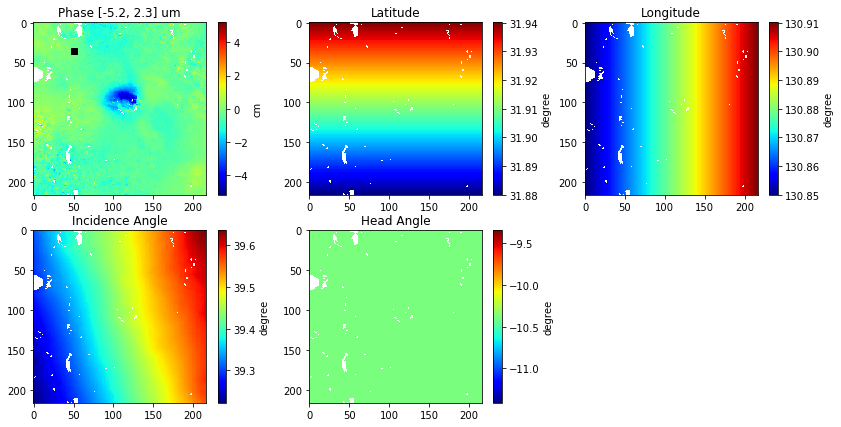

In [3]:
# Go to the mintpy directory
work_dir = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy')
os.chdir(work_dir)
print('Go to directory', work_dir)

# basic info
atr = readfile.read_attribute('velocity.h5')
date12 = atr['DATE12']

# save deformation to binary file in ROIPAC format
scp_args = 'velocity.h5 -m maskTempCoh.h5 --ref-lalo {lat} {lon}'.format(lat=ref_lat, lon=ref_lon)
print('save_roipac.py', scp_args)
unw_file2 = save_roipac.main(scp_args.split())
unw_file2 = os.path.abspath(unw_file2)

# prepare mat file in GBIS format
scp_args = '{} -g inputs/geometryGeo.h5 --out-dir {}'.format(unw_file2, out_dir)
print('save_gbis.py', scp_args)
mat_file = save_gbis.main(scp_args.split())

### Shinmoedake - ALOS asc & desc -> horz & vert

asc_desc2horz_vert.py /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy/20081012_20100302.unw /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy/20080929_20100520.unw -o /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeHz.h5 /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeUp.h5
Input 1st file is .unw
---------------------
reading /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy/20081012_20100302.unw
heading angle: 190.38851165771484
near   incidence angle : 36.6067 degree
far    incidence angle : 37.0345 degree
center incidence angle : 36.8206 degree
---------------------
reading /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy/20080929_20100520.unw
heading angle: 349.6238098144531
near   incidence angle : 36.5388 degree
far    incidence angle : 36.9677 degree
center incidence angle : 36.7532 degree
---------------------
writing horizontal component to file: /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoedakeHz.h5
delet

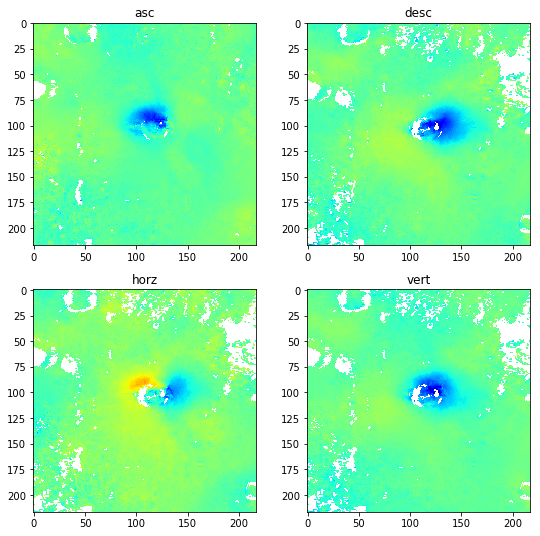

In [4]:
## Generate decomposed file
out_files = [os.path.join(out_dir, i) for i in ['ShinmoedakeHz.h5', 'ShinmoedakeUp.h5']]
scp_args = '{f1} {f2} -o {o1} {o2}'.format(f1=unw_file1, f2=unw_file2, o1=out_files[0], o2=out_files[1])
print('asc_desc2horz_vert.py', scp_args)
asc_desc2horz_vert.main(scp_args.split())

## Plot
## 1 - read data
dmax = 0
data_list = []
for fname in [unw_file2, unw_file1, out_files[0], out_files[1]]:
    data, atr = readfile.read(fname)
    phase2range = -float(atr['WAVELENGTH']) / (4. * np.pi)
    data *= phase2range
    data_list.append(data)
    dmax = max(dmax, np.nanmax(np.abs(data)))

## 2 - plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[9, 9])
axs = axs.flatten()
fig_titles = ['asc', 'desc', 'horz', 'vert']
for i in range(len(data_list)):
    axs[i].imshow(data_list[i], vmin=-dmax, vmax=dmax, cmap='jet')
    axs[i].set_title(fig_titles[i])
plt.show()

### Source geometry based on the ratio of max horz / vert displacement

In [5]:
max_west_dis = -np.nanmin(data_list[2]) * 100.
max_east_dis = np.nanmax(data_list[2]) * 100.
max_vert_dis = np.nanmax(np.abs(data_list[3])) * 100.
print('max vert displacement: {:.2f} cm'.format(max_vert_dis))
print('max east displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_east_dis, max_east_dis/max_vert_dis))
print('max west displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_west_dis, max_west_dis/max_vert_dis))

max vert displacement: 6.50 cm
max east displacement: 3.25 cm; horz/vert ratio: 0.50
max west displacement: 4.65 cm; horz/vert ratio: 0.72


Typical ratio of max horz/vert displacement (Fig. 4 and 6 in Fialko et al., 2001):
+ Sills: < 0.3
+ Spherical sources: ~0.4

Thus, we model this displacement as **Finite Spherical Source** (McTigue, 1987).